# Principal Component Analysis with Cancer Data

In [80]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [81]:
# Dataset Description fetched from "breast-cancer-wisconsin.names"

cancer_data=pd.read_csv('breast-cancer-wisconsin.data.txt')

cancer_data.columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']


cancer_data.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [82]:
cancer_data.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [22]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample code number             698 non-null int64
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null object
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [23]:
cancer_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sample code number,698,NaN,NaN,NaN,1.07181e+06,617532,61634,870258,1.17171e+06,1.23835e+06,1.34544e+07
Clump Thickness,698,NaN,NaN,NaN,4.41691,2.81767,1,2,4,6,10
Uniformity of Cell Size,698,NaN,NaN,NaN,3.13754,3.05258,1,1,1,5,10
Uniformity of Cell Shape,698,NaN,NaN,NaN,3.2106,2.97287,1,1,1,5,10
Marginal Adhesion,698,NaN,NaN,NaN,2.80946,2.85661,1,1,1,4,10
Single Epithelial Cell Size,698,NaN,NaN,NaN,3.21777,2.21541,1,2,2,4,10
Bare Nuclei,698,11,1,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bland Chromatin,698,NaN,NaN,NaN,3.4384,2.44006,1,2,3,5,10
Normal Nucleoli,698,NaN,NaN,NaN,2.86963,3.055,1,1,1,4,10
Mitoses,698,NaN,NaN,NaN,1.59026,1.71616,1,1,1,1,10


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [83]:
error=[]
j=len(cancer_data['Uniformity of Cell Size'])
for col in cancer_data.columns:
    for j in range(0,j,1):
        try:
            k=cancer_data[col][j]
            int(k)
        except Exception:
            error.append([k,col,j])

print('Non-Numerical "',error[0][0],'" Observations exist in the variable "',error[0][1],'"')

Non-Numerical " ? " Observations exist in the variable " Bare Nuclei "


In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [84]:
cancer_data['Bare Nuclei'].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [85]:
cancer_data['Bare Nuclei']=cancer_data['Bare Nuclei'].map(lambda x:1 if x=='?'else x)
cancer_data['Bare Nuclei']=cancer_data['Bare Nuclei'].astype('int64')
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample code number             698 non-null int64
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null int64
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

   Class  count      prop
0      2    457  0.654728
1      4    241  0.345272


<function matplotlib.pyplot.show(*args, **kw)>

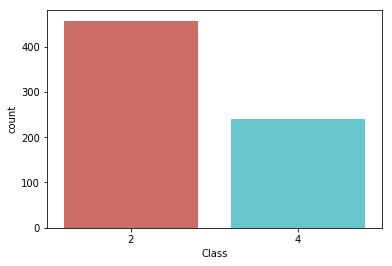

In [86]:
# To Plot the data distribution for the target columns "class", 2 for benign, 4 for malignant
freq = cancer_data['Class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print(freq)
sns.countplot(x='Class',data=cancer_data,palette='hls')
plt.show

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

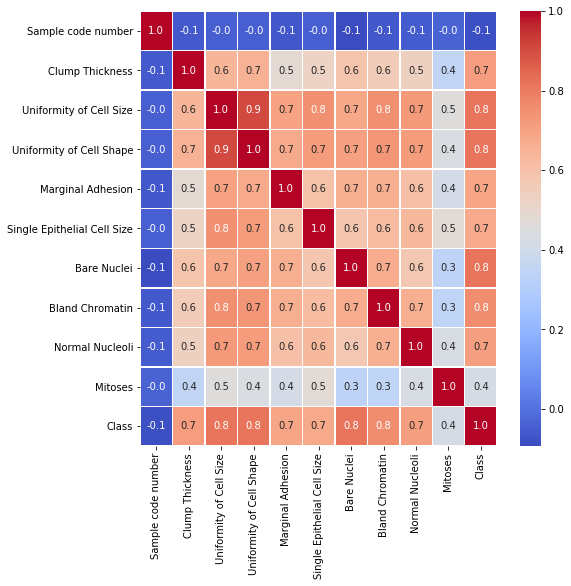

In [88]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cancer_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap = "coolwarm")

In [1]:
#Let us check for pair plots

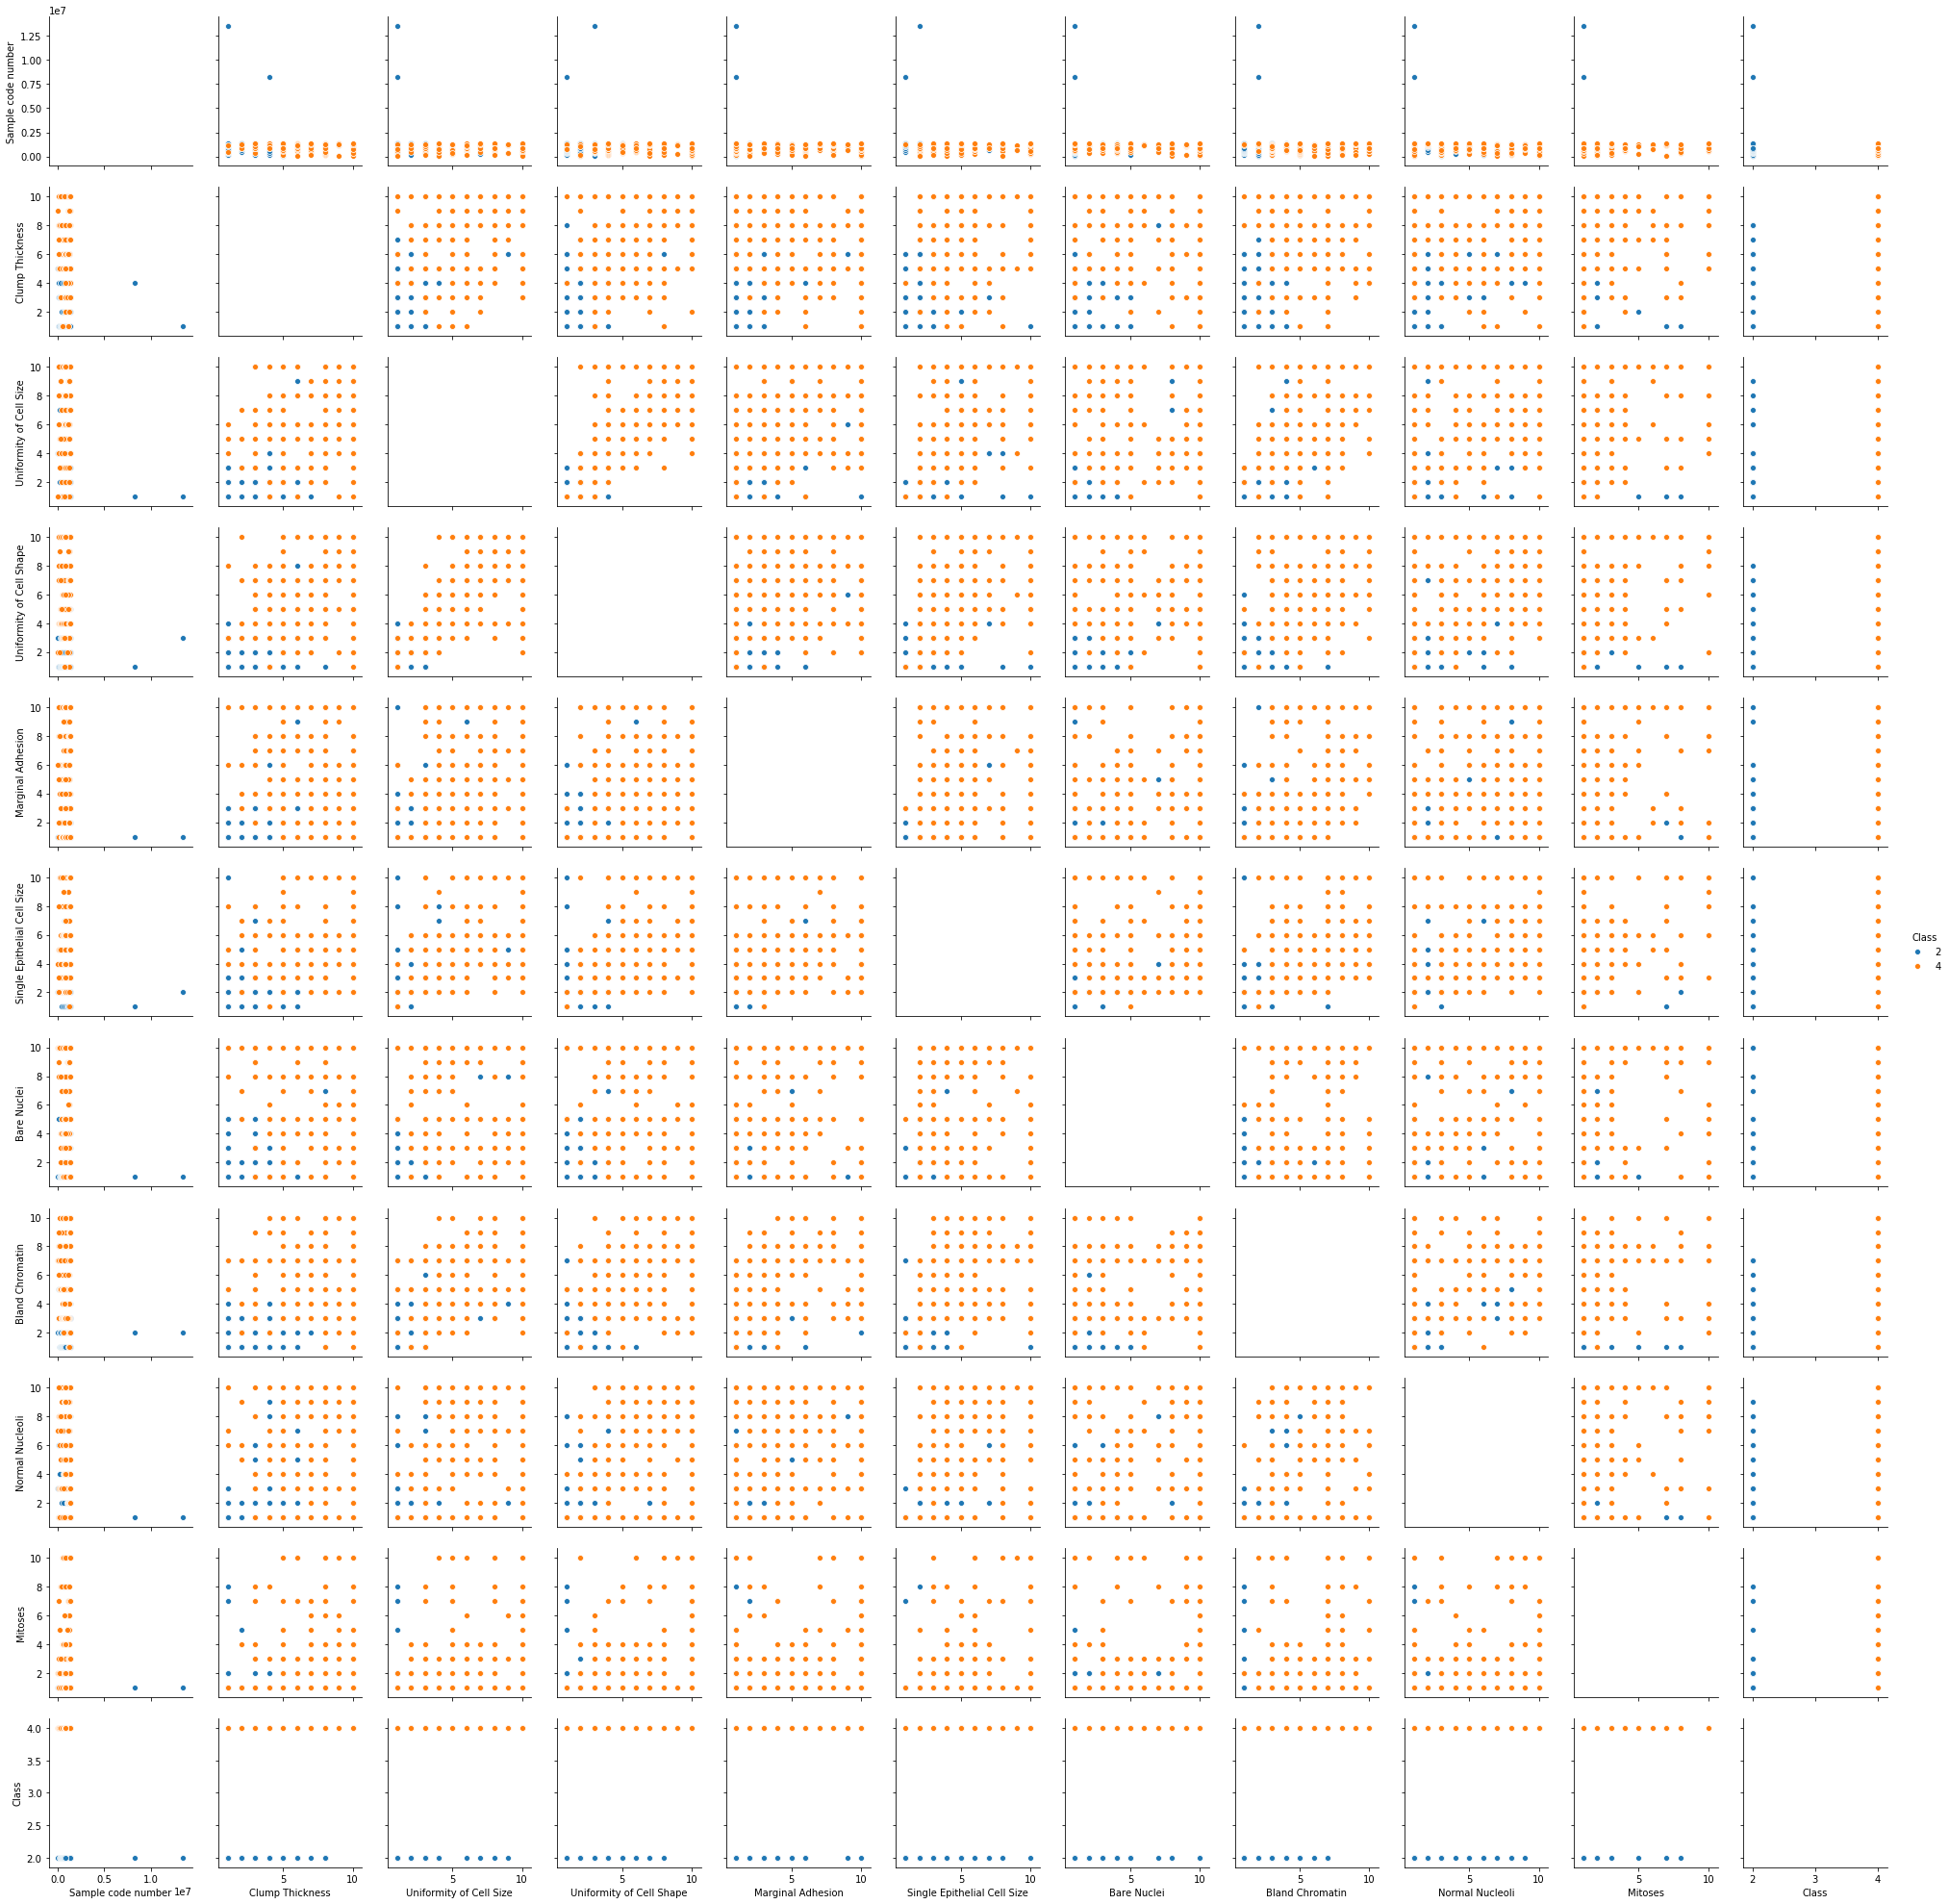

In [89]:
sns.pairplot(cancer_data, diag_kind='', hue = 'Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [91]:
cancer_data.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.092679,-0.060082,-0.052188,-0.034961,-0.080378
Clump Thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.590430,0.558511,0.536176,0.350176,0.716509
Uniformity of Cell Size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.686457,0.755824,0.722699,0.458548,0.817772
Uniformity of Cell Shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.707261,0.736066,0.719272,0.438756,0.818794
Marginal Adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.666765,0.666759,0.603132,0.417476,0.696605
Single Epithelial Cell Size,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.583484,0.616108,0.628704,0.478975,0.682618
Bare Nuclei,-0.092679,0.590430,0.686457,0.707261,0.666765,0.583484,1.000000,0.674281,0.574524,0.342203,0.818839
Bland Chromatin,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,0.674281,1.000000,0.665914,0.344118,0.756732
Normal Nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.574524,0.665914,1.000000,0.428185,0.712067
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.342203,0.344118,0.428185,1.000000,0.423008


# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [92]:
cancer_data_mod=cancer_data.drop(columns=['Sample code number','Class'])

In [93]:
cancer_data_mod.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1
5,1,1,1,1,2,10,3,1,1
6,2,1,2,1,2,1,3,1,1
7,2,1,1,1,2,1,1,1,5
8,4,2,1,1,2,1,2,1,1
9,1,1,1,1,1,1,3,1,1


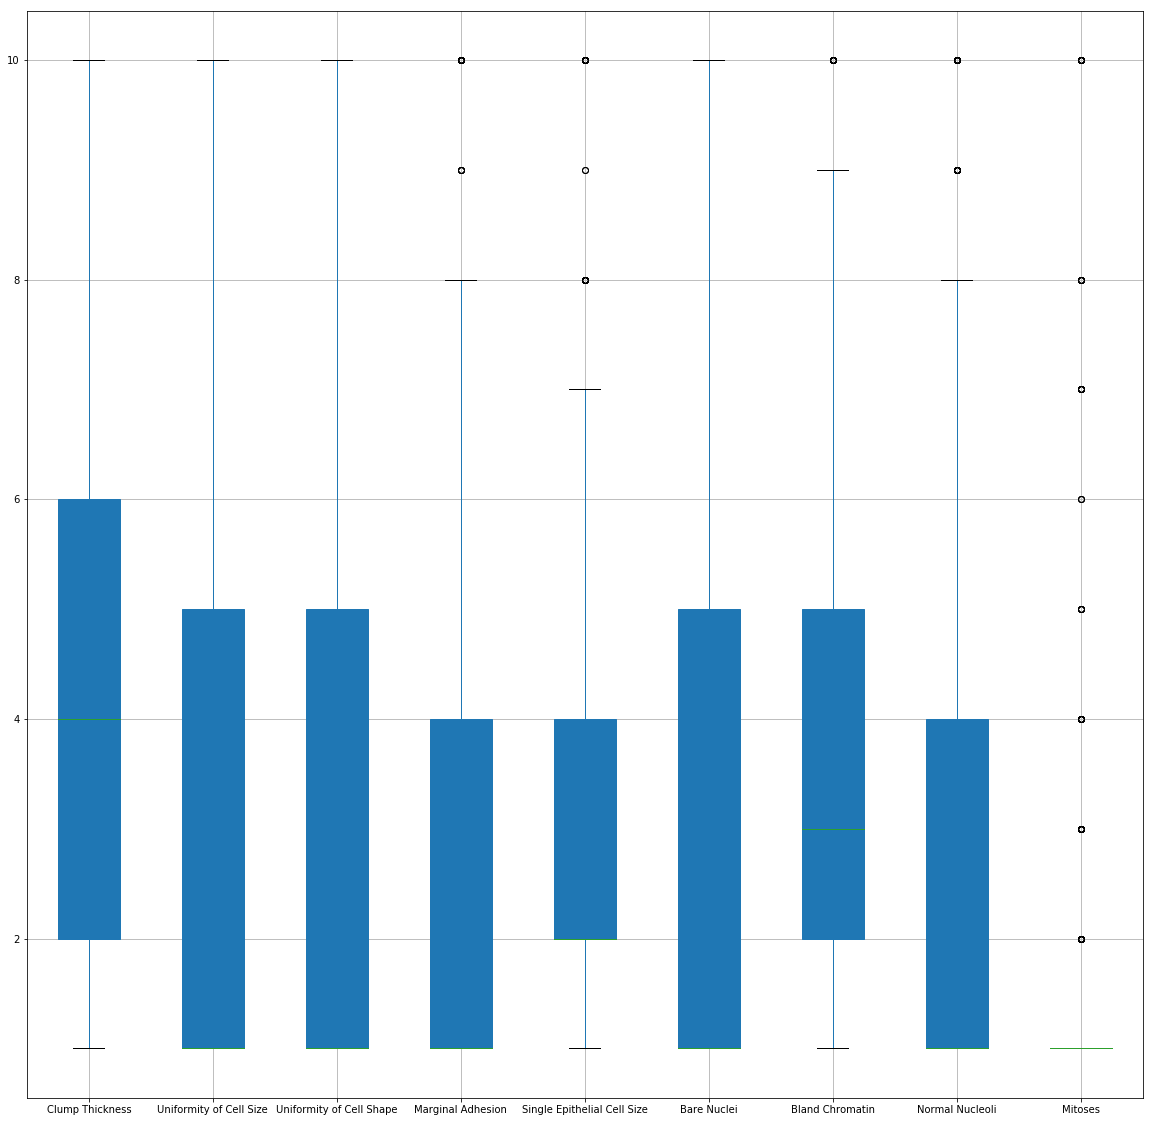

In [94]:
cancer_data_mod.boxplot(figsize=(20,20),patch_artist=True)

In [95]:
cancer_dat = cancer_data_mod
#treating of outliers
def IQR_outliers_detect(column):
    q1 = cancer_dat[column].quantile(.25)
    q3 = cancer_dat[column].quantile(.75)
    IQR = q3-q1
    print("IQR : {}".format(IQR))
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    print("upper cap : {}".format(upper))
    print("lower cap : {}".format(lower))

In [96]:
# Upper and lower cap for per features with ourtliers
print(IQR_outliers_detect('Mitoses'))
print(IQR_outliers_detect('Normal Nucleoli'))
print(IQR_outliers_detect('Single Epithelial Cell Size'))
print(IQR_outliers_detect('Marginal Adhesion'))

IQR : 0.0
upper cap : 1.0
lower cap : 1.0
None
IQR : 3.0
upper cap : 8.5
lower cap : -3.5
None
IQR : 2.0
upper cap : 7.0
lower cap : -1.0
None
IQR : 3.0
upper cap : 8.5
lower cap : -3.5
None


In [97]:
# From outliers we can find out that the  "Mitoses" has outliers, thus checking for response of target feature with "Cross tab"
print(pd.crosstab(cancer_data['Mitoses'],cancer_data['Class']))
print(pd.crosstab(cancer_data['Normal Nucleoli'],cancer_data['Class']))
print(pd.crosstab(cancer_data['Single Epithelial Cell Size'],cancer_data['Class']))
print(pd.crosstab(cancer_data['Marginal Adhesion'],cancer_data['Class']))

Class      2    4
Mitoses          
1        444  134
2          8   27
3          2   31
4          0   12
5          1    5
6          0    3
7          1    8
8          1    7
10         0   14
Class              2   4
Normal Nucleoli         
1                401  41
2                 30   6
3                 12  32
4                  1  17
5                  2  17
6                  4  18
7                  2  14
8                  4  20
9                  1  15
10                 0  61
Class                          2   4
Single Epithelial Cell Size         
1                             46   1
2                            362  23
3                             29  43
4                              7  41
5                              5  34
6                              2  39
7                              3   9
8                              2  19
9                              0   2
10                             1  30
Class                2   4
Marginal Adhesion         
1   

In [98]:
# From the response "Crosstab",combining the outlier to "4" for "Mitoses" feature only
cancer_data_mod['Mitoses']=cancer_data_mod['Mitoses'].map(lambda x: 4 if x>=5<9 else x)
cancer_data_mod['Mitoses'].value_counts()

1    578
4     52
2     35
3     33
Name: Mitoses, dtype: int64

In [99]:
from scipy.stats import zscore
cancer_data_mod= cancer_data_mod.apply(zscore)
cancer_data_mod

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.207090,0.282739,0.265725,0.767385,1.708465,1.798001,-0.179795,-0.284861,-0.418464
1,-0.503224,-0.700742,-0.744126,-0.633883,-0.550074,-0.411514,-0.179795,-0.612427,-0.418464
2,0.562247,1.594048,1.612192,-0.633883,-0.098366,0.140864,-0.179795,1.352972,-0.418464
3,-0.148067,-0.700742,-0.744126,0.066751,-0.550074,-0.687704,-0.179795,-0.612427,-0.418464
4,1.272562,2.249702,2.285426,1.818335,1.708465,1.798001,2.280928,1.352972,-0.418464
5,-1.213539,-0.700742,-0.744126,-0.633883,-0.550074,1.798001,-0.179795,-0.612427,-0.418464
6,-0.858381,-0.700742,-0.407509,-0.633883,-0.550074,-0.687704,-0.179795,-0.612427,-0.418464
7,-0.858381,-0.700742,-0.744126,-0.633883,-0.550074,-0.687704,-1.000036,-0.612427,2.991123
8,-0.148067,-0.372915,-0.744126,-0.633883,-0.550074,-0.687704,-0.589915,-0.612427,-0.418464
9,-1.213539,-0.700742,-0.744126,-0.633883,-1.001782,-0.687704,-0.179795,-0.612427,-0.418464


# Q6 Create a covariance matrix for identifying Principal components

In [2]:
# PCA
# Step 1 - Create covariance matrix


In [100]:
cancer_data_mod.cov().T

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Clump Thickness,1.001435,0.646292,0.656029,0.487397,0.522857,0.591277,0.559313,0.536945,0.408196
Uniformity of Cell Size,0.646292,1.001435,0.908115,0.706409,0.752753,0.687442,0.756908,0.723736,0.507642
Uniformity of Cell Shape,0.656029,0.908115,1.001435,0.683851,0.720556,0.708276,0.737122,0.720304,0.478562
Marginal Adhesion,0.487397,0.706409,0.683851,1.001435,0.600262,0.667721,0.667716,0.603998,0.476386
Single Epithelial Cell Size,0.522857,0.752753,0.720556,0.600262,1.001435,0.584321,0.616992,0.629606,0.496464
Bare Nuclei,0.591277,0.687442,0.708276,0.667721,0.584321,1.001435,0.675249,0.575349,0.435077
Bland Chromatin,0.559313,0.756908,0.737122,0.667716,0.616992,0.675249,1.001435,0.666870,0.393443
Normal Nucleoli,0.536945,0.723736,0.720304,0.603998,0.629606,0.575349,0.666870,1.001435,0.480453
Mitoses,0.408196,0.507642,0.478562,0.476386,0.496464,0.435077,0.393443,0.480453,1.001435


In [101]:
std=cancer_data_mod.T
std

,0,1,2,3,4,5,6,7,8,9,...,688,689,690,691,692,693,694,695,696,697
Clump Thickness,0.207090,-0.503224,0.562247,-0.148067,1.272562,-1.213539,-0.858381,-0.858381,-0.148067,-1.213539,...,-1.213539,-1.213539,0.207090,-0.503224,-0.503224,-0.503224,-0.858381,0.207090,-0.148067,-0.148067
Uniformity of Cell Size,0.282739,-0.700742,1.594048,-0.700742,2.249702,-0.700742,-0.700742,-0.700742,-0.372915,-0.700742,...,-0.700742,-0.700742,2.249702,-0.700742,-0.700742,-0.700742,-0.700742,2.249702,1.594048,1.594048
Uniformity of Cell Shape,0.265725,-0.744126,1.612192,-0.744126,2.285426,-0.744126,-0.407509,-0.744126,-0.744126,-0.744126,...,-0.744126,-0.744126,2.285426,-0.744126,-0.744126,-0.744126,-0.744126,2.285426,0.938959,1.612192
Marginal Adhesion,0.767385,-0.633883,-0.633883,0.066751,1.818335,-0.633883,-0.633883,-0.633883,-0.633883,-0.633883,...,-0.633883,0.066751,0.767385,-0.633883,-0.633883,-0.633883,-0.633883,0.066751,0.417068,0.767385
Single Epithelial Cell Size,1.708465,-0.550074,-0.098366,-0.550074,1.708465,-0.550074,-0.550074,-0.550074,-0.550074,-1.001782,...,-0.550074,-0.550074,0.353342,-0.550074,-0.550074,-0.098366,-0.550074,1.708465,-0.098366,0.353342
Bare Nuclei,1.798001,-0.411514,0.140864,-0.687704,1.798001,1.798001,-0.687704,-0.687704,-0.687704,-0.687704,...,-0.687704,-0.687704,0.417054,-0.687704,-0.687704,-0.411514,-0.687704,-0.135325,0.140864,0.417054
Bland Chromatin,-0.179795,-0.179795,-0.179795,-0.179795,2.280928,-0.179795,-0.179795,-1.000036,-0.589915,-0.179795,...,-1.000036,-1.000036,0.230326,-1.000036,-0.589915,-1.000036,-1.000036,1.870807,2.691048,2.691048
Normal Nucleoli,-0.284861,-0.612427,1.352972,-0.612427,1.352972,-0.612427,-0.612427,-0.612427,-0.612427,-0.612427,...,-0.612427,-0.612427,0.370272,-0.612427,-0.612427,-0.612427,-0.612427,2.335671,1.025405,0.370272
Mitoses,-0.418464,-0.418464,-0.418464,-0.418464,-0.418464,-0.418464,-0.418464,2.991123,-0.418464,-0.418464,...,2.991123,-0.418464,-0.418464,-0.418464,0.718065,-0.418464,-0.418464,0.718065,-0.418464,-0.418464


In [102]:
np.cov(std)

array([[1.00143472, 0.6462923 , 0.65602872, 0.48739701, 0.52285721,
        0.59127672, 0.55931278, 0.53694543, 0.40819566],
       [0.6462923 , 1.00143472, 0.90811469, 0.70640902, 0.7527529 ,
        0.68744174, 0.75690801, 0.72373557, 0.50764224],
       [0.65602872, 0.90811469, 1.00143472, 0.683851  , 0.72055597,
        0.70827594, 0.73712156, 0.72030428, 0.47856181],
       [0.48739701, 0.70640902, 0.683851  , 1.00143472, 0.60026232,
        0.66772134, 0.66771591, 0.60399765, 0.47638614],
       [0.52285721, 0.7527529 , 0.72055597, 0.60026232, 1.00143472,
        0.58432119, 0.61699188, 0.62960559, 0.49646351],
       [0.59127672, 0.68744174, 0.70827594, 0.66772134, 0.58432119,
        1.00143472, 0.67524886, 0.57534853, 0.43507749],
       [0.55931278, 0.75690801, 0.73712156, 0.66771591, 0.61699188,
        0.67524886, 1.00143472, 0.66686971, 0.39344312],
       [0.53694543, 0.72373557, 0.72030428, 0.60399765, 0.62960559,
        0.57534853, 0.66686971, 1.00143472, 0.48045331],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [103]:
w,v=np.linalg.eig(np.cov(std))

In [104]:
print('EigenValues:\n',w,'\n\nEiginVertor\n',v)

EigenValues:
 [5.96625664 0.69294666 0.54103256 0.08864204 0.48225803 0.38476203
 0.26225498 0.30669273 0.28806681] 

EiginVertor
 [[-0.30168911  0.12555697 -0.86657477 -0.00394295 -0.01772834  0.04362149
  -0.24272901  0.28292766  0.03269833]
 [-0.37850834  0.08717696  0.03707661 -0.73526887  0.20229332 -0.11858615
   0.45092553  0.10151648 -0.1962446 ]
 [-0.37448416  0.13595275 -0.01912701  0.66527582  0.1747802  -0.08844893
   0.5889808   0.03354544 -0.10920483]
 [-0.33128072  0.01004462  0.38792592  0.04186139 -0.47606311 -0.02666243
  -0.11829827  0.68448121  0.16750318]
 [-0.33315249 -0.10490806  0.15978841  0.06344691  0.43580065 -0.65233861
  -0.44699459 -0.09214878  0.15710646]
 [-0.33315321  0.16885081 -0.06086769 -0.07572312 -0.57057484 -0.14370435
   0.08290819 -0.60257608  0.36726174]
 [-0.34349839  0.27408701  0.18622112  0.06307593 -0.08087823  0.26688265
  -0.39859782 -0.22467542 -0.69361472]
 [-0.33395619 -0.02363925  0.15664683 -0.02364773  0.39569263  0.67055423
  -0

# Q8 Find variance and cumulative variance by each eigen vector

In [105]:
#Variance values
print(w)
print(w.sum())

[5.96625664 0.69294666 0.54103256 0.08864204 0.48225803 0.38476203
 0.26225498 0.30669273 0.28806681]
9.012912482065996


In [106]:
#Cumulative Variance
w.sum()
EigenValues=w/w.sum()
np.cumsum(EigenValues)

array([0.66196767, 0.73885143, 0.79888004, 0.80871504, 0.8622225 ,
       0.90491259, 0.93401028, 0.96803843, 1.        ])

In [ ]:
#Based on Cumulative onservation, considering the components as 7, so n_componenets = 7 & with a target of 93% coverage

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(cancer_data_mod)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [109]:
X_pca_values = pca.transform(cancer_data_mod)

In [110]:
X_pca_values.shape

(698, 7)

In [111]:
pca.components_

array([[ 0.30168911,  0.37850834,  0.37448416,  0.33128072,  0.33315249,
         0.33315321,  0.34349839,  0.33395619,  0.25343695],
       [-0.12555697, -0.08717696, -0.13595275, -0.01004462,  0.10490806,
        -0.16885081, -0.27408701,  0.02363925,  0.91807014],
       [-0.86657477,  0.03707661, -0.01912701,  0.38792592,  0.15978841,
        -0.06086769,  0.18622112,  0.15664683, -0.09147335],
       [ 0.01772834, -0.20229332, -0.1747802 ,  0.47606311, -0.43580065,
         0.57057484,  0.08087823, -0.39569263,  0.151615  ],
       [-0.04362149,  0.11858615,  0.08844893,  0.02666243,  0.65233861,
         0.14370435, -0.26688265, -0.67055423, -0.09183935],
       [ 0.28292766,  0.10151648,  0.03354544,  0.68448121, -0.09214878,
        -0.60257608, -0.22467542, -0.08386982, -0.10442221],
       [-0.03269833,  0.1962446 ,  0.10920483, -0.16750318, -0.15710646,
        -0.36726174,  0.69361472, -0.49023056,  0.19860732]])

In [112]:
pca.explained_variance_

array([5.96625664, 0.69294666, 0.54103256, 0.48225803, 0.38476203,
       0.30669273, 0.28806681])

In [115]:
pca.explained_variance_ratio_

array([0.66196767, 0.07688377, 0.0600286 , 0.05350746, 0.04269009,
       0.03402815, 0.03196157])

# Q10 Find correlation between components and features

In [116]:
cancer_cor=pd.DataFrame(pca.components_)
cancer_cor.columns=cancer_data_mod.columns
cancer_cor

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.301689,0.378508,0.374484,0.331281,0.333152,0.333153,0.343498,0.333956,0.253437
1,-0.125557,-0.087177,-0.135953,-0.010045,0.104908,-0.168851,-0.274087,0.023639,0.918070
2,-0.866575,0.037077,-0.019127,0.387926,0.159788,-0.060868,0.186221,0.156647,-0.091473
3,0.017728,-0.202293,-0.174780,0.476063,-0.435801,0.570575,0.080878,-0.395693,0.151615
4,-0.043621,0.118586,0.088449,0.026662,0.652339,0.143704,-0.266883,-0.670554,-0.091839
5,0.282928,0.101516,0.033545,0.684481,-0.092149,-0.602576,-0.224675,-0.083870,-0.104422
6,-0.032698,0.196245,0.109205,-0.167503,-0.157106,-0.367262,0.693615,-0.490231,0.198607


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [118]:
jokes_data=pd.read_csv('jokes.csv')
print(jokes_data.shape)
jokes_data.head(10)

(24983, 101)


,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [119]:
ratings=jokes_data.drop(columns=['NumJokes'])
ratings=ratings.head(200)
ratings.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [120]:
ratings.columns=range(0,100)
ratings.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [121]:
ratings1=ratings.replace(99,0,inplace=True)
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ratings)
ratings_diff=pd.DataFrame(scaler.transform(ratings),columns=ratings.columns)
ratings_diff.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,-0.539640,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,-1.064321,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,-0.499588,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,1.454948,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [123]:
mean_var=pd.DataFrame(ratings_diff.mean(axis=0))
mean_var

,0
0,-1.110223e-17
1,-9.658940e-17
2,-4.107825e-17
3,3.719247e-17
4,-8.881784e-18
5,-2.636780e-18
6,-1.665335e-18
7,2.331468e-17
8,-4.329870e-17
9,-2.553513e-17


# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [124]:
mean_var.nlargest(10,mean_var[:])

,0
98,1.840889e-16
81,1.243450e-16
97,1.198694e-16
20,1.065814e-16
94,1.054712e-16
92,8.770762e-17
47,7.771561e-17
73,7.743806e-17
99,7.549517e-17
49,7.494005e-17
